In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 400)

In [8]:
import os
os.chdir('..')

In [12]:
datasets = ['CTNNB1', 'Erk', 'IRF4', 'Ikk2', 'Jnk', 'LEF1']
featuresets = ['Raw', 'Di', 'Dc']
treatments = ['BCR', 'CD40', 'All']

In [13]:
from pathlib import Path
for dataset in datasets:
    for featureset in featuresets:
        for treatment in treatments:
            file = f'{dataset}-{featureset}-{treatment}'
            if Path(f'Results/Previous/{file}.txt').exists() and \
               Path(f'Results/Results/{file}.txt').exists():
                print(f'{file} found in Both')
            elif Path(f'Results/Previous/{file}.txt').exists():
                print(f'{file} found in Previous')
            elif Path(f'Results/Results/{file}.txt').exists():
                print(f'{file} found in Results')
            else:
                print(f'{file} not found')

CTNNB1-Raw-BCR found in Previous
CTNNB1-Raw-CD40 found in Previous
CTNNB1-Raw-All found in Results
CTNNB1-Di-BCR found in Results
CTNNB1-Di-CD40 found in Previous
CTNNB1-Di-All found in Previous
CTNNB1-Dc-BCR found in Previous
CTNNB1-Dc-CD40 found in Previous
CTNNB1-Dc-All found in Previous
Erk-Raw-BCR found in Results
Erk-Raw-CD40 found in Results
Erk-Raw-All found in Previous
Erk-Di-BCR found in Previous
Erk-Di-CD40 found in Previous
Erk-Di-All found in Previous
Erk-Dc-BCR found in Previous
Erk-Dc-CD40 found in Previous
Erk-Dc-All found in Previous
IRF4-Raw-BCR found in Results
IRF4-Raw-CD40 found in Results
IRF4-Raw-All found in Results
IRF4-Di-BCR found in Results
IRF4-Di-CD40 found in Results
IRF4-Di-All found in Results
IRF4-Dc-BCR found in Results
IRF4-Dc-CD40 found in Results
IRF4-Dc-All found in Results
Ikk2-Raw-BCR found in Results
Ikk2-Raw-CD40 found in Results
Ikk2-Raw-All found in Results
Ikk2-Di-BCR found in Results
Ikk2-Di-CD40 found in Results
Ikk2-Di-All found in Resul

## Previous

In [15]:
file = 'Results/Previous/CTNNB1-Raw-BCR.txt'
with open(file, 'r') as f:
    lines = f.readlines()

In [131]:
%%time
from tqdm import tqdm_notebook
run, feature_ranker, classifier, num_features, bag = None, None, None, None, None 
means, ensembles, results = [], [], []
for line in tqdm_notebook(lines[2:], total=len(lines)-2):
    tokens = [t.strip() for t in line.split('|')]
    if len(tokens) == 3:
        tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens]
        means += [{
            'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
            'NumFeatures': num_features, 'Num Bags': np.nan, 'Mean TPR': tpr,
            'Mean TNR': tnr, 'Mean GMean': gmean
        }]
    elif len(tokens) == 12:
        run, feature_ranker, classifier = int(tokens[0].split(':')[-1]), tokens[1], tokens[2]
        num_features, bag = int(tokens[3].split(':')[-1]), tokens[4]
        tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens[5:8]]
        tp, tn, fp, fn = [int(t.split(':')[-1]) for t in tokens[8:]]
        payload = {
            'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
            'NumFeatures': num_features, 'TPR': tpr,
            'TNR': tnr, 'GMean': gmean, 'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
        }
        if 'Ensemble' in bag:
            ensembles += [{**payload, 'Num Bags': int(bag.split()[2])}]
        else:
            results += [{**payload, 'Bag': int(bag.split(':')[-1])}]

HBox(children=(IntProgress(value=0, max=191250), HTML(value='')))


CPU times: user 2.06 s, sys: 12 ms, total: 2.07 s
Wall time: 2.06 s


In [132]:
len(lines), len(means), len(ensembles), len(results)

(191252, 1875, 1875, 187500)

In [133]:
results = pd.DataFrame(results, columns=['Run', 'FeatureRanker', 'Classifier', 
                                'NumFeatures', 'Bag', 'TPR', 'TNR',
                                'GMean', 'TP', 'TN', 'FP', 'FN'])
ensembles = pd.DataFrame(ensembles, columns=['Run', 'FeatureRanker', 'Classifier', 
                                  'NumFeatures', 'Num Bags', 'TPR', 'TNR',
                                  'GMean', 'TP', 'TN', 'FP', 'FN'])
means = pd.DataFrame(means, columns=['Run', 'FeatureRanker', 'Classifier',
                              'NumFeatures', 'Num Bags', 'Mean TPR', 
                              'Mean TNR', 'Mean GMean'])

In [134]:
results.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN
86067,3,Ttest,LGBMClassifier,12,267,0.0667,0.9375,0.2500,2,38380,2558,28
184642,5,Brattacharyya,KNeighborsClassifier,8,142,0.2000,0.8164,0.4041,6,33421,7517,24
121729,4,Entropy,LGBMClassifier,12,229,0.2000,0.8612,0.4150,6,35256,5682,24
94598,3,Brattacharyya,SVC,8,98,0.4000,0.5774,0.4806,12,23636,17302,18
3427,1,Ttest,RandomForestClassifier,12,127,0.0333,0.9698,0.1798,1,39701,1237,29


In [135]:
ensembles.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,TPR,TNR,GMean,TP,TN,FP,FN
153,1,Entropy,SVC,4,100,0.6667,0.4082,0.5217,20,16710,24228,10
1687,5,Brattacharyya,SVC,2,200,0.6667,0.3333,0.4714,20,13646,27292,10
428,2,Brattacharyya,RandomForestClassifier,12,300,0.0000,0.9625,0.0000,0,39403,1535,30
447,2,Wilcoxon,RandomForestClassifier,18,100,0.1667,0.8828,0.3836,5,36139,4799,25
1509,5,Entropy,RandomForestClassifier,8,100,0.1667,0.8596,0.3785,5,35190,5748,25


In [137]:
means.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,Mean TPR,Mean TNR,Mean GMean
1406,4,Wilcoxon,LogisticRegression,2,NaN,0.6667,0.3333,0.4714
916,3,Entropy,SVC,12,NaN,0.5890,0.4902,0.5219
1365,4,Entropy,LogisticRegression,12,NaN,0.1377,0.8417,0.3360
917,3,Entropy,SVC,12,NaN,0.6012,0.4851,0.5255
1538,5,Brattacharyya,RandomForestClassifier,2,NaN,0.1467,0.8533,0.2011


In [138]:
results.GMean.describe()

count    187500.000000
mean          0.387097
std           0.140136
min           0.000000
25%           0.332100
50%           0.427800
75%           0.471400
max           0.719000
Name: GMean, dtype: float64

In [140]:
ensembles.GMean.describe()

count    1875.000000
mean        0.374675
std         0.138750
min         0.000000
25%         0.300800
50%         0.398100
75%         0.471400
max         0.683400
Name: GMean, dtype: float64

## Results

In [141]:
file = 'Results/Results/CTNNB1-Raw-All.txt'

In [142]:
with open(file, 'r') as f:
    lines = f.readlines()

In [143]:
lens = [len(line.split('|')) for line in lines]

In [145]:
pd.Series(lens).value_counts()

13    12000
12     1000
3       500
4         2
dtype: int64

In [153]:
def load_result(dataset, featureset, treatment):
    file = f'{dataset}-{featureset}-{treatment}.txt'
    folder = 'Results/Previous' if Path(f'Results/Previous/{file}') \
             else 'Results/Results'
    with open(f'{folder}/{file}', 'r') as f:
        lines = f.readlines()
    run, feature_ranker, classifier, num_features, bag = None, None, None, None, None 
    means, ensembles, results = [], [], []
    for line in lines[2:]:
        tokens = [t.strip() for t in line.split('|')]
        if len(tokens) == 3:
            tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens]
            means += [{
                'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
                'NumFeatures': num_features, 'Num Bags': np.nan, 'Mean TPR': tpr,
                'Mean TNR': tnr, 'Mean GMean': gmean
            }]
        elif len(tokens) >= 12:
            if len(tokens) == 13:
                tokens = tokens[1:]
            run, feature_ranker, classifier = int(tokens[0].split(':')[-1]), tokens[1], tokens[2]
            num_features, bag = int(tokens[3].split(':')[-1]), tokens[4]
            tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens[5:8]]
            tp, tn, fp, fn = [int(t.split(':')[-1]) for t in tokens[8:]]
            payload = {
                'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
                'NumFeatures': num_features, 'TPR': tpr,
                'TNR': tnr, 'GMean': gmean, 'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
            }
            if 'Ensemble' in bag:
                ensembles += [{**payload, 'Num Bags': int(bag.split()[2])}]
            else:
                results += [{**payload, 'Bag': int(bag.split(':')[-1])}]
    results = pd.DataFrame(results, columns=['Run', 'FeatureRanker', 'Classifier', 
                                    'NumFeatures', 'Bag', 'TPR', 'TNR',
                                    'GMean', 'TP', 'TN', 'FP', 'FN'])
    ensembles = pd.DataFrame(ensembles, columns=['Run', 'FeatureRanker', 'Classifier', 
                                      'NumFeatures', 'Num Bags', 'TPR', 'TNR',
                                      'GMean', 'TP', 'TN', 'FP', 'FN'])
    means = pd.DataFrame(means, columns=['Run', 'FeatureRanker', 'Classifier',
                                  'NumFeatures', 'Num Bags', 'Mean TPR', 
                                  'Mean TNR', 'Mean GMean'])
    return results, ensembles, means

In [146]:
%%time
from tqdm import tqdm_notebook
run, feature_ranker, classifier, num_features, bag = None, None, None, None, None 
means, ensembles, results = [], [], []
for line in tqdm_notebook(lines[2:], total=len(lines)-2):
    tokens = [t.strip() for t in line.split('|')]
    if len(tokens) == 3:
        tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens]
        means += [{
            'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
            'NumFeatures': num_features, 'Num Bags': np.nan, 'Mean TPR': tpr,
            'Mean TNR': tnr, 'Mean GMean': gmean
        }]
    elif len(tokens) >= 12:
        if len(tokens) == 13:
            tokens = tokens[1:]
        run, feature_ranker, classifier = int(tokens[0].split(':')[-1]), tokens[1], tokens[2]
        num_features, bag = int(tokens[3].split(':')[-1]), tokens[4]
        tpr, tnr, gmean = [float(t.split(':')[-1]) for t in tokens[5:8]]
        tp, tn, fp, fn = [int(t.split(':')[-1]) for t in tokens[8:]]
        payload = {
            'Run': run, 'FeatureRanker': feature_ranker, 'Classifier': classifier,
            'NumFeatures': num_features, 'TPR': tpr,
            'TNR': tnr, 'GMean': gmean, 'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
        }
        if 'Ensemble' in bag:
            ensembles += [{**payload, 'Num Bags': int(bag.split()[2])}]
        else:
            results += [{**payload, 'Bag': int(bag.split(':')[-1])}]

HBox(children=(IntProgress(value=0, max=13500), HTML(value='')))


CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 192 ms


In [147]:
results = pd.DataFrame(results, columns=['Run', 'FeatureRanker', 'Classifier', 
                                'NumFeatures', 'Bag', 'TPR', 'TNR',
                                'GMean', 'TP', 'TN', 'FP', 'FN'])
ensembles = pd.DataFrame(ensembles, columns=['Run', 'FeatureRanker', 'Classifier', 
                                  'NumFeatures', 'Num Bags', 'TPR', 'TNR',
                                  'GMean', 'TP', 'TN', 'FP', 'FN'])
means = pd.DataFrame(means, columns=['Run', 'FeatureRanker', 'Classifier',
                              'NumFeatures', 'Num Bags', 'Mean TPR', 
                              'Mean TNR', 'Mean GMean'])

In [152]:
len(lines), len(means), len(ensembles), len(results)

(13502, 500, 500, 12500)

In [149]:
results.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN
3034,1,Entropy,LGBMClassifier,12,34,0.5500,0.5856,0.5675,33,47950,33926,27
4401,1,Wilcoxon,LGBMClassifier,4,1,0.3333,0.6667,0.4714,20,54584,27292,40
457,1,Entropy,RandomForestClassifier,10,57,0.1833,0.8982,0.4058,11,73545,8331,49
10302,1,Entropy,KNeighborsClassifier,8,2,0.5833,0.4641,0.5203,35,37997,43879,25
7848,1,Entropy,LogisticRegression,8,48,0.4667,0.5144,0.4900,28,42120,39756,32


In [150]:
ensembles.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,TPR,TNR,GMean,TP,TN,FP,FN
420,1,Entropy,KNeighborsClassifier,12,25,0.8000,0.3735,0.5466,48,30583,51293,12
188,1,Wilcoxon,LGBMClassifier,10,25,0.4333,0.6066,0.5127,26,49668,32208,34
324,1,Ttest,LogisticRegression,2,25,0.6667,0.3333,0.4714,40,27292,54584,20
2,1,Entropy,RandomForestClassifier,2,75,0.4833,0.5771,0.5282,29,47254,34622,31
495,1,Wilcoxon,KNeighborsClassifier,12,100,0.7167,0.3766,0.5195,43,30838,51038,17


In [151]:
means.sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,Mean TPR,Mean TNR,Mean GMean
333,1,Ttest,LogisticRegression,6,NaN,0.4377,0.5307,0.4751
375,1,Wilcoxon,LogisticRegression,2,NaN,0.6650,0.3350,0.4704
384,1,Wilcoxon,LogisticRegression,8,NaN,0.5533,0.4403,0.4909
304,1,Entropy,LogisticRegression,4,NaN,0.5453,0.4376,0.4853
9,1,Entropy,RandomForestClassifier,6,NaN,0.0937,0.9163,0.2836


## Checkpoint

In [159]:
from SVMExperiments.utils import load_result, list_files
datasets = ['CTNNB1', 'Erk', 'IRF4', 'Ikk2', 'Jnk', 'LEF1']
featuresets = ['Raw', 'Di', 'Dc']
treatments = ['BCR', 'CD40', 'All']

In [160]:
list_files(datasets, featuresets, treatments)

CTNNB1-Raw-BCR found in Previous
CTNNB1-Raw-CD40 found in Previous
CTNNB1-Raw-All found in Results
CTNNB1-Di-BCR found in Results
CTNNB1-Di-CD40 found in Previous
CTNNB1-Di-All found in Previous
CTNNB1-Dc-BCR found in Previous
CTNNB1-Dc-CD40 found in Previous
CTNNB1-Dc-All found in Previous
Erk-Raw-BCR found in Results
Erk-Raw-CD40 found in Results
Erk-Raw-All found in Previous
Erk-Di-BCR found in Previous
Erk-Di-CD40 found in Previous
Erk-Di-All found in Previous
Erk-Dc-BCR found in Previous
Erk-Dc-CD40 found in Previous
Erk-Dc-All found in Previous
IRF4-Raw-BCR found in Results
IRF4-Raw-CD40 found in Results
IRF4-Raw-All found in Results
IRF4-Di-BCR found in Results
IRF4-Di-CD40 found in Results
IRF4-Di-All found in Results
IRF4-Dc-BCR found in Results
IRF4-Dc-CD40 found in Results
IRF4-Dc-All found in Results
Ikk2-Raw-BCR found in Results
Ikk2-Raw-CD40 found in Results
Ikk2-Raw-All found in Results
Ikk2-Di-BCR found in Results
Ikk2-Di-CD40 found in Results
Ikk2-Di-All found in Resul

In [166]:
results, ensembles, means = load_result('Erk', 'Dc', 'CD40')

In [167]:
results.head()

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN
0,1,Entropy,RandomForestClassifier,2,0,0.4405,0.6185,0.5219,37,43404,26775,47
1,1,Entropy,RandomForestClassifier,2,1,0.3810,0.6026,0.4791,32,42287,27892,52
2,1,Entropy,RandomForestClassifier,2,2,0.2738,0.6020,0.4060,23,42245,27934,61
3,1,Entropy,RandomForestClassifier,2,3,0.4524,0.5792,0.5119,38,40649,29530,46
4,1,Entropy,RandomForestClassifier,2,4,0.3929,0.6057,0.4878,33,42510,27669,51


In [292]:
ensembles.head(30)

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,TPR,TNR,GMean,TP,TN,FP,FN,dataset,featureset,treatment
0,1,Entropy,RandomForestClassifier,2,25,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
1,1,Entropy,RandomForestClassifier,2,50,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
2,1,Entropy,RandomForestClassifier,2,75,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
3,1,Entropy,RandomForestClassifier,2,100,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
4,1,Entropy,RandomForestClassifier,4,25,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
5,1,Entropy,RandomForestClassifier,4,50,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
6,1,Entropy,RandomForestClassifier,4,75,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
7,1,Entropy,RandomForestClassifier,4,100,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
8,1,Entropy,RandomForestClassifier,6,25,0.8148,0.3289,0.5177,22,15884,32407,5,IRF4,Raw,BCR
9,1,Entropy,RandomForestClassifier,6,50,0.7778,0.3173,0.4968,21,15321,32970,6,IRF4,Raw,BCR


In [168]:
ensembles.head()

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,TPR,TNR,GMean,TP,TN,FP,FN
0,1,Entropy,RandomForestClassifier,2,100,0.3690,0.6311,0.4826,31,44290,25889,53
1,1,Entropy,RandomForestClassifier,2,200,0.3452,0.6254,0.4647,29,43888,26291,55
2,1,Entropy,RandomForestClassifier,2,300,0.3571,0.6257,0.4727,30,43911,26268,54
3,1,Entropy,RandomForestClassifier,4,100,0.3690,0.6344,0.4839,31,44525,25654,53
4,1,Entropy,RandomForestClassifier,4,200,0.3810,0.6357,0.4921,32,44610,25569,52


In [169]:
means.head()

,Run,FeatureRanker,Classifier,NumFeatures,Num Bags,Mean TPR,Mean TNR,Mean GMean
0,1,Entropy,RandomForestClassifier,2,NaN,0.4011,0.5940,0.4869
1,1,Entropy,RandomForestClassifier,2,NaN,0.4024,0.5931,0.4874
2,1,Entropy,RandomForestClassifier,2,NaN,0.4021,0.5935,0.4874
3,1,Entropy,RandomForestClassifier,4,NaN,0.3918,0.6223,0.4924
4,1,Entropy,RandomForestClassifier,4,NaN,0.3924,0.6232,0.4929


In [170]:
len(means), len(ensembles)

(1221, 1221)

In [171]:
results.GMean.describe()

count    122322.000000
mean          0.471369
std           0.055041
min           0.218700
25%           0.434900
50%           0.482100
75%           0.512200
max           0.646800
Name: GMean, dtype: float64

## Plots

In [279]:
datasets = ['IRF4']
featuresets = ['Raw', 'Di', 'Dc']
treatments = ['BCR', 'CD40', 'All']

In [280]:
from SVMExperiments.utils import list_files

In [281]:
list_files(datasets, featuresets, treatments)

IRF4-Raw-BCR found in Results
IRF4-Raw-CD40 found in Results
IRF4-Raw-All found in Results
IRF4-Di-BCR found in Results
IRF4-Di-CD40 found in Results
IRF4-Di-All found in Results
IRF4-Dc-BCR found in Results
IRF4-Dc-CD40 found in Results
IRF4-Dc-All found in Results


In [282]:
results = pd.DataFrame()
ensembles = pd.DataFrame()
means = pd.DataFrame()
for dataset in datasets:
    for featureset in featuresets:
        for treatment in treatments:
            res, ens, mea = load_result(dataset, featureset, treatment)
            res['dataset'] = dataset
            res['featureset'] = featureset
            res['treatment'] = treatment
            ens['dataset'] = dataset
            ens['featureset'] = featureset
            ens['treatment'] = treatment
            mea['dataset'] = dataset
            mea['featureset'] = featureset
            mea['treatment'] = treatment
            
            results = pd.concat([results, res])
            ensembles = pd.concat([ensembles, ens])
            means = pd.concat([means, mea])

In [181]:
results.head()

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN,dataset,featureset,treatment
0,1,Entropy,RandomForestClassifier,2,0,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
1,1,Entropy,RandomForestClassifier,2,1,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
2,1,Entropy,RandomForestClassifier,2,2,0.3333,0.6667,0.4714,10,27292,13646,20,CTNNB1,Raw,BCR
3,1,Entropy,RandomForestClassifier,2,3,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
4,1,Entropy,RandomForestClassifier,2,4,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR


In [209]:
def filter_df(df, featureset, treatment, featranker):
    return df[(df.featureset==featureset) & (df.treatment==treatment) & (df.FeatureRanker==featranker) & (df.Run==1) & (df.Bag < 100)]

In [212]:
df = filter_df(results, 'Raw', 'BCR', 'Entropy')

In [213]:
df.head()

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN,dataset,featureset,treatment
0,1,Entropy,RandomForestClassifier,2,0,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
1,1,Entropy,RandomForestClassifier,2,1,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
2,1,Entropy,RandomForestClassifier,2,2,0.3333,0.6667,0.4714,10,27292,13646,20,CTNNB1,Raw,BCR
3,1,Entropy,RandomForestClassifier,2,3,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR
4,1,Entropy,RandomForestClassifier,2,4,0.0000,1.0000,0.0000,0,40938,0,30,CTNNB1,Raw,BCR


In [226]:
def plot_classifier(df, classifier, ops):
    for op in ops:
        df[df.Classifier==classifier].groupby('NumFeatures')['GMean'].agg(op).plot()

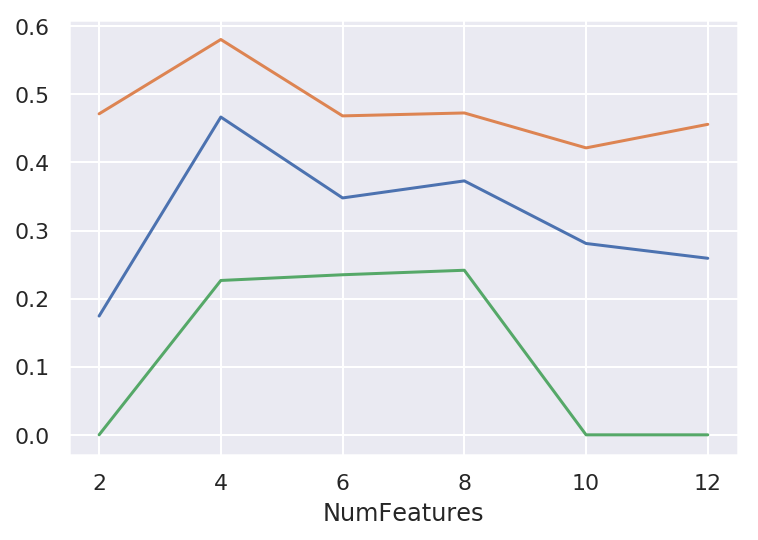

In [227]:
plot_classifier(df, 'RandomForestClassifier', ['mean', 'max', 'min'])

In [228]:
df.Classifier.unique()

array(['RandomForestClassifier', 'LGBMClassifier', 'SVC',
       'LogisticRegression', 'KNeighborsClassifier'], dtype=object)

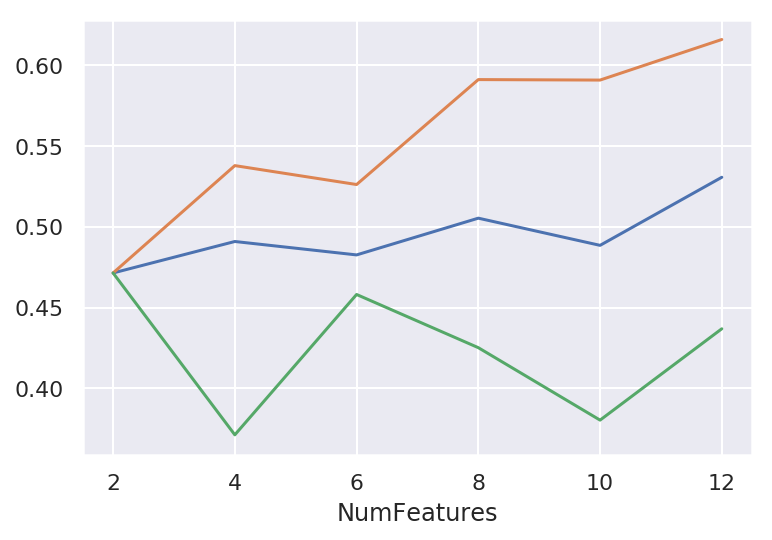

In [229]:
plot_classifier(df, 'SVC', ['mean', 'max', 'min'])

## Plot results

In [230]:
print(results.FeatureRanker.unique())

['Entropy' 'Ttest' 'Brattacharyya' 'Wilcoxon']


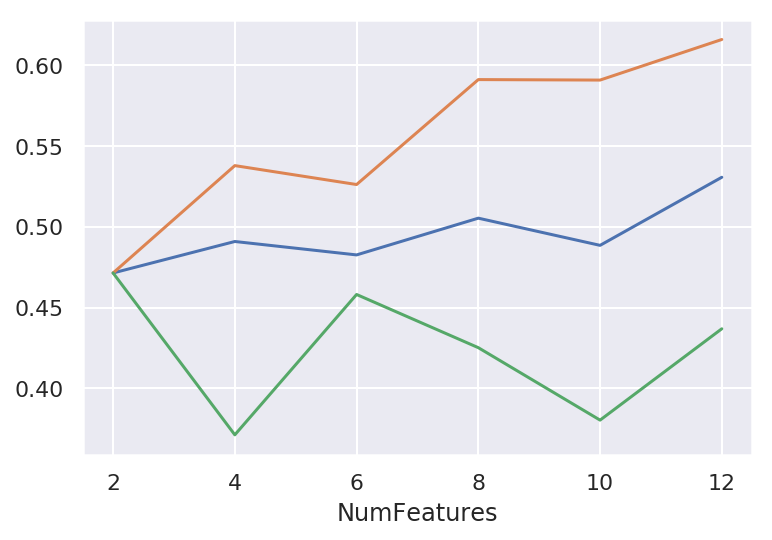

In [231]:
df = filter_df(results, 'Raw', 'BCR', 'Entropy')
plot_classifier(df, 'SVC', ['mean', 'max', 'min'])

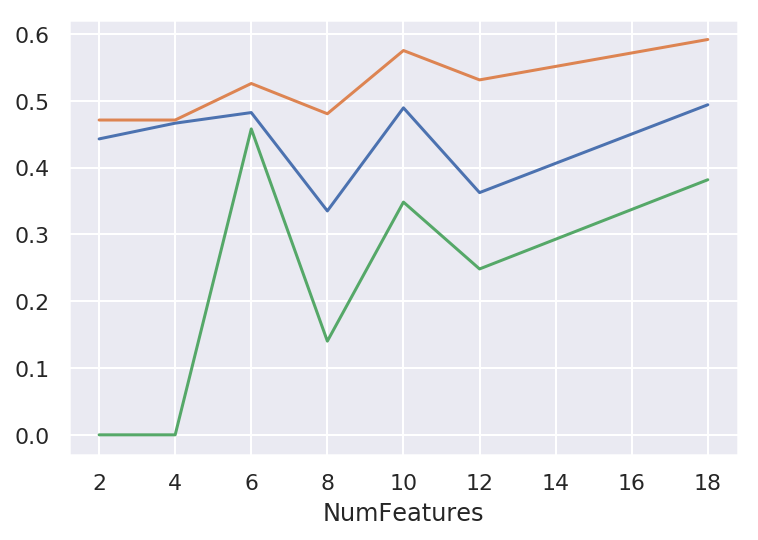

In [232]:
df = filter_df(results, 'Raw', 'BCR', 'Wilcoxon')
plot_classifier(df, 'SVC', ['mean', 'max', 'min'])

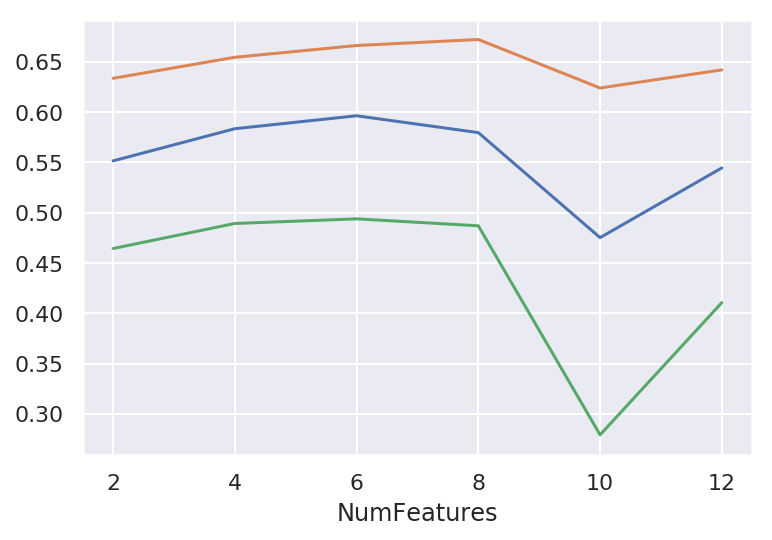

In [235]:
df = filter_df(results, 'Di', 'BCR', 'Entropy')
plot_classifier(df, 'SVC', ['mean', 'max', 'min'])

In [274]:
results[(results.featureset=='Dc') & (results.treatment=='All') & (results.FeatureRanker=='Ttest')].Classifier.value_counts()

RandomForestClassifier    1800
LGBMClassifier             907
Name: Classifier, dtype: int64

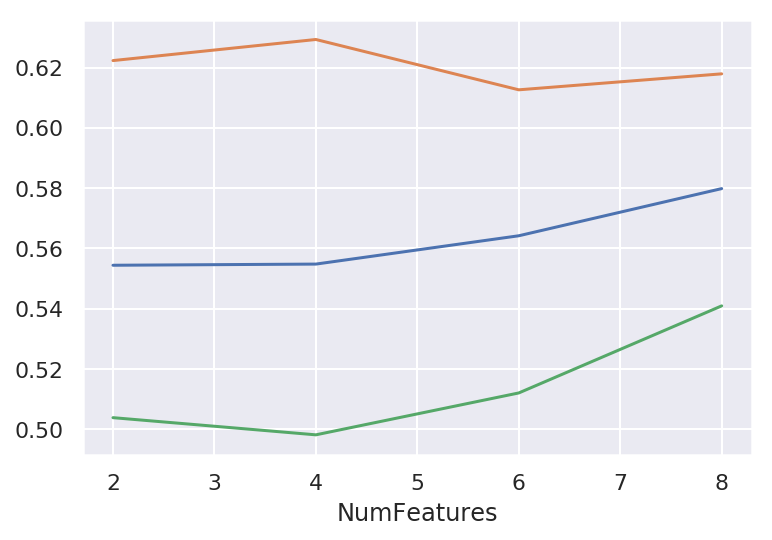

In [278]:
df = filter_df(results, 'Dc', 'All', 'Ttest')
plot_classifier(df, 'LGBMClassifier', ['mean', 'max', 'min'])

In [ ]:
def plot_classifier(df, classifier, ops):
    for op in ops:
        df[df.Classifier==classifier].groupby('NumFeatures')['GMean'].agg(op).plot()

In [287]:
results.head()

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN,dataset,featureset,treatment
0,1,Entropy,RandomForestClassifier,2,0,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
1,1,Entropy,RandomForestClassifier,2,1,0.3333,0.6667,0.4714,9,32194,16097,18,IRF4,Raw,BCR
2,1,Entropy,RandomForestClassifier,2,2,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
3,1,Entropy,RandomForestClassifier,2,3,1.0000,0.0000,0.0000,27,0,48291,0,IRF4,Raw,BCR
4,1,Entropy,RandomForestClassifier,2,4,0.3333,0.6667,0.4714,9,32194,16097,18,IRF4,Raw,BCR


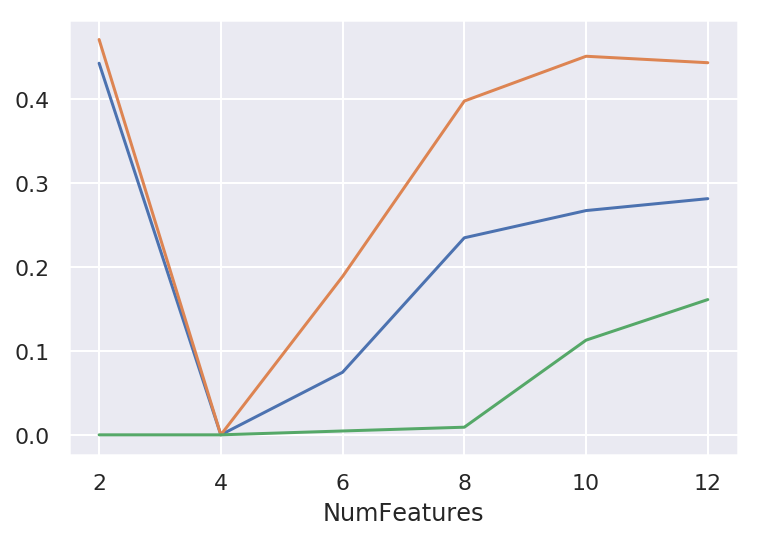

In [291]:
df = filter_df(results, 'Raw', 'BCR', 'Entropy')
plot_classifier(df, 'SVC', ['mean', 'max', 'min'])

In [ ]:
df.

In [283]:
??filter_df

Signature: filter_df(df, featureset, treatment, featranker)
Source:   
def filter_df(df, featureset, treatment, featranker):
    return df[(df.featureset==featureset) & (df.treatment==treatment) & (df.FeatureRanker==featranker) & (df.Run==1) & (df.Bag < 100)]
File:      ~/Documents/genomic-causality-prediction/<ipython-input-209-dbbcf9738919>
Type:      function


In [284]:
df = df[(df.Run==1) & (df.Bag<100)]

In [285]:
df.shape

(907, 15)

In [236]:
results[results.featureset=='Di'].NumFeatures.value_counts()

12    62000
10    62000
8     62000
6     62000
4     62000
2     62000
45    15500
Name: NumFeatures, dtype: int64

In [269]:
results[(results.featureset=='Di') & (results.NumFeatures==45)].sample(5)

,Run,FeatureRanker,Classifier,NumFeatures,Bag,TPR,TNR,GMean,TP,TN,FP,FN,dataset,featureset,treatment
164840,5,Wilcoxon,LGBMClassifier,45,140,0.7333,0.4127,0.5502,22,16897,24041,8,CTNNB1,Di,CD40
97422,3,Wilcoxon,SVC,45,222,0.7333,0.3199,0.4843,22,13096,27842,8,CTNNB1,Di,CD40
74956,2,Wilcoxon,KNeighborsClassifier,45,256,0.8333,0.3083,0.5069,25,12622,28316,5,CTNNB1,Di,CD40
127324,4,Wilcoxon,LGBMClassifier,45,124,0.6000,0.5431,0.5708,18,22232,18706,12,CTNNB1,Di,CD40
97338,3,Wilcoxon,SVC,45,138,0.8333,0.3097,0.5080,50,25360,56516,10,CTNNB1,Di,All


In [185]:
results.GMean.describe()

count    1.160207e+06
mean     4.422664e-01
std      1.739121e-01
min      0.000000e+00
25%      4.371000e-01
50%      5.016000e-01
75%      5.451000e-01
max      7.190000e-01
Name: GMean, dtype: float64

In [186]:
ensembles.GMean.describe()

count    12352.000000
mean         0.445132
std          0.172648
min          0.000000
25%          0.439875
50%          0.502100
75%          0.548700
max          0.683400
Name: GMean, dtype: float64

In [188]:
means['Mean GMean'].describe()

count    12352.000000
mean         0.445083
std          0.162401
min          0.000000
25%          0.442400
50%          0.504500
75%          0.538400
max          0.612200
Name: Mean GMean, dtype: float64